In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로 확인
!pwd

/content


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


## Convolutional Neural Network

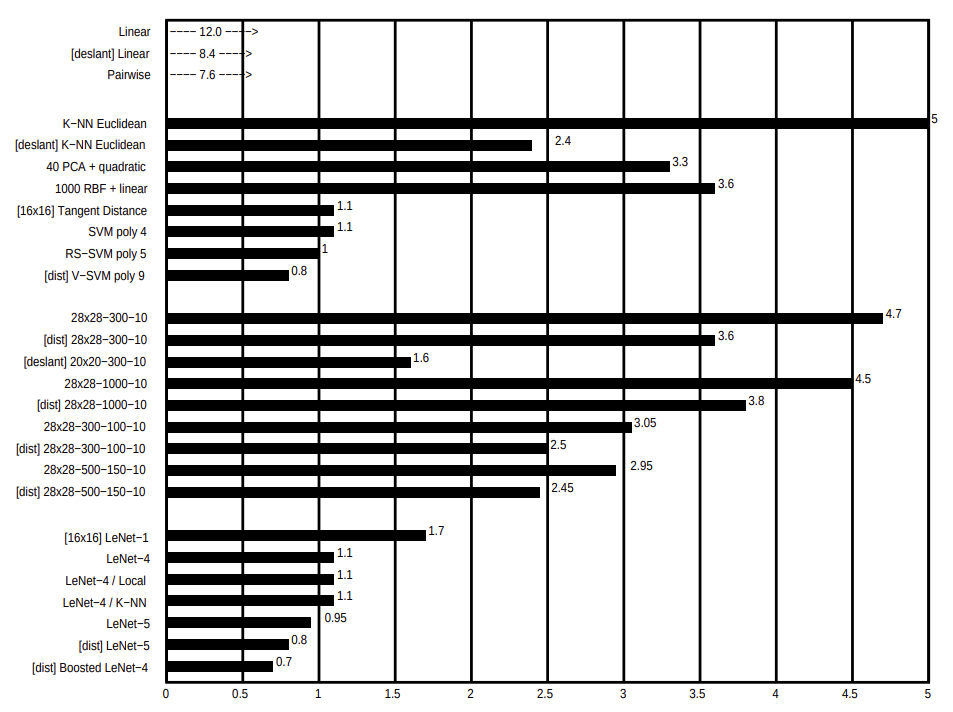

```
위 막대 그래프는 다양한 분류 방법의 테스트 셋에 대한 오류율 이다 
[deslant]는 기울어진 데이터 셋을 기반으로 학습된 분류 모델이다 
[dist]는 인위적으로 왜곡된 샘플이 추가된 학습 데이터를 사용한 모델이다 

다른 알고리즘과 비교했을 때 성능이 가장 좋았고, 자기 자신의 예전 모델과도 비교해서 가장 성능이 좋았다 
(Boosted 된 LeNet-4가 성능이 가장 좋았다) 
```

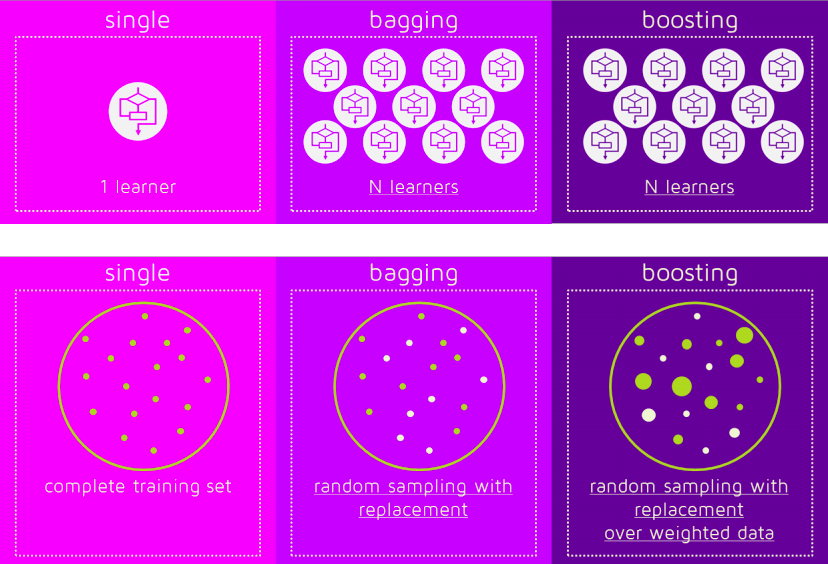

## Bagging

```
Bagging은 샘플을 무작위로 여러 번 뽑아 각 모델을 학습시켜 결과를 평균내는 방법이다 (Ensemble 기법중 하나) 
Bagging 복원 추출을 하고 전체 데이터에서 일부를 뽑아 모델을 학습시킨다 
여러 모델중에서 평균을 내는 방법이기 때문에 편차를 줄여주고 Overfitting을 피할 수 있는 방법이다
일반적인 모델을 만드는 것에 강점이 있다

ex) random forest 
```

## Boosting

```
Boosting은 Bagging과 동일하게 전체 데이터에서 일부 데이터만 사용하고 복원 추출을 한다 
두 방법의 차이점은 잘 못 분류한 데이터들이 있을 경우 가중치를 두고 모델을 점차 강화한다는 점이다 
학습이 끝나면 나온 결과에따라 가중치가 재분배 된다 
오답에 대해 높은 가중치를 부여하고, 정답에 대해 낮은 가중치를 부여하기 때문에 오답에 더욱 집중하여 학습을 하게 된다 
Bagging보다 좀 더 맞추기 어려운 문제나 성능을 좋은 장점은 있지만 outlier에 취약한 단점을 지니고 있다 

ex) XGBoost, AdaBoost, GradientBoost
```


## Convolution 두 가지 관점

``` 
1. 미리 자르는 방식 
2. 이동하여 자르는 방식 (좌상->우하)
```

## 이미지 데이터에 대해서 전통적인 NN보다 CNN이 더 좋은 이유 

```
전통적인 NN에서 이미지 데이터를 2D에서 1D로 변형할 때 두 가지 문제가 발생한다 
1. column이 많아지는 문제 
2. Locality를 상실한다  

그러나 CNN에서는 두 가지 문제를 해결할 수 있다 
1. convolution filter를 거치는 것은 데이터의 차원을 줄이지않고 그대로 사용하기 때문에 column이 많이 늘어나지 않는다. 즉, 적은 column을 갖는다 
2. convolution filter를 거치면 특징이 있는지 없는지 관한 데이터로 변형 되기 때문에 Locality를 잃지 않는다 
```

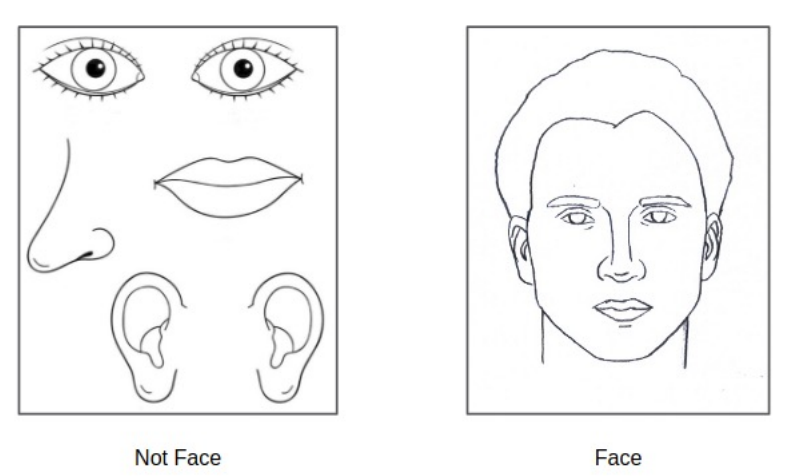

```
NN은 오른쪽 사진이 사람이라는 것과 왼쪽 사진이 사람이 아니라는 것을 잘 구별은 하지만 
사람의 얼굴 크기가 많이 달라진다거나 방향이 비틀어졌거나 다른 위치에 있으면 사람이더라도 
사람이라고 구별을 잘 못하는 경우가 발생할 수 있다 

반면 CNN은 오른쪽 사진이 사람이라는 것과 사람의 얼굴 크기가 다르거나, 위치가 다르거나 방향이 뒤틀려도 잘 구별한다 
하지만 왼쪽 사진 처럼 사람의 특징이 부분 별로 나뉘어져 있어도 전체를 보고 판단하지 않기 때문에 사람이라고 구별하는 오류를 범할 수 있다 
```

## Locally connected neural network

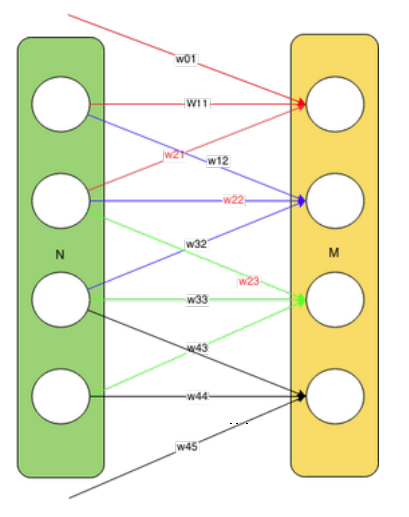

```
Locally connected neural network는 전통적인 NN에서 특징들의 위치 데이터에 민감하여 
다양한 경우의 이미지를 구별하지 못하는 문제점을 보완한 방법이다 (ex) 크기가 다르거나 뒤틀리거나 하는 이미지를 구별하지 못하는 문제)  
가까운 노드 끼리만 연결된다 

연산 복잡도도 줄어들고 상대적인 위치에 대한 정보를 보기 때문에 
shared weight를 쓰지 않았기 때문에 같은 값이면 같은 특징이다라는 점을 활용하지 못한다 
```

## Convolutional neural network(shared-weight local)

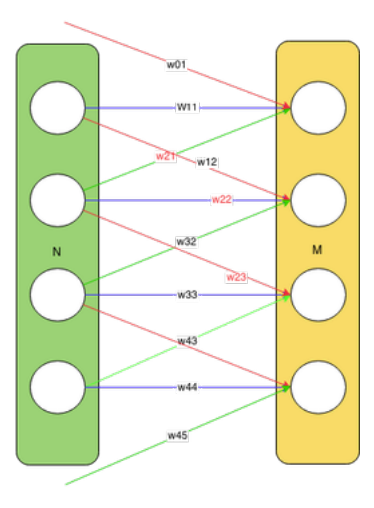

```
CNN은 shared-weight를 사용하면서 locally connected neural network인 모델이다 
shared-weight를 사용하기 때문에 같은 값이면 같은 특징이다라는 점을 활용할 수 있고, 
locally connected하기 때문에 부분적인 특징을 보고 특징이 있는지 없는지 여부를 판단할 수 있다 (Locality를 잃지 않는다)
```

## CNN의 가정

```
1. Stationarity of statistics 
- 정상성 
- 이미지에서의 정상성이란 이미지의 한 부분에 대한 통계가 다른 부분들과 동일하다는 가정을 한다 
- 이미지에서 한 특징이 위치에 상관없이 여러 군데 존재할 수 있고 특정 부분에서 학습된 특징 파라미터를 이용해 
다른 위치에서도 동일한 특징을 추출할 수 있다는 의미이다 

2. Locality of pixel dependencies 
- 이미지는 작은 특징들로 구성되어 있기 때문에 각 픽셀들의 종속성은 특징이 있는 작은 지역으로 한정된다.
- 이미지를 구성하는 특징들은 이미지 전체가 아닌 일부 지역에 근접한 픽셀들로만 구성되고
근접한 픽셀들끼리만 종속성을 가진다 
```

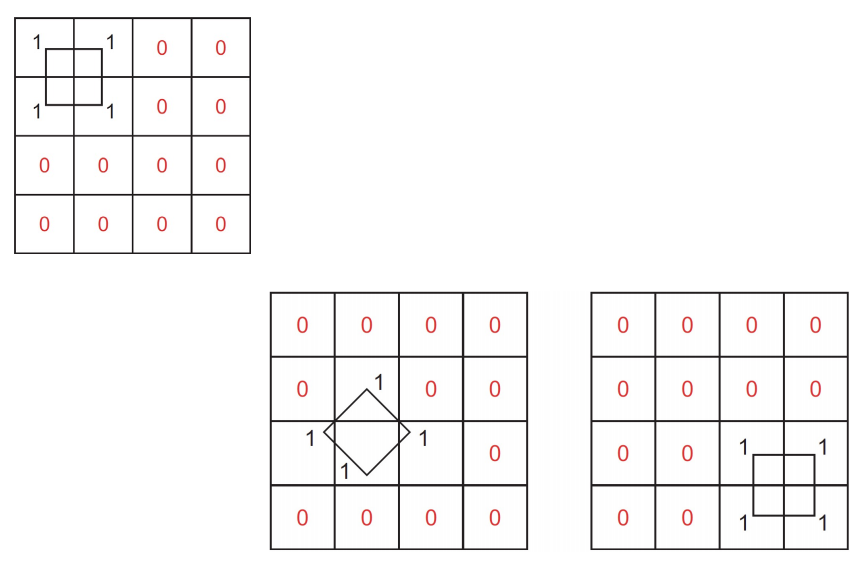

```
위 그림에서 왼쪽의 경우와 오른쪽의 경우는 같은 것이라 판단할 수 있지만 
가운데의 것도 같은 것이라고 판단할 수 있을까? 
convolutional layer를 한 번만 통과했다면 다른 것이라 판단할 수 있지만 
layer를 여러번 통과한다면 세 가지 경우 모두 같은 특성이라고 볼수 있게 된다 
=> layer가 많으면 많을 수록 좋은 점 
```

In [25]:
import tensorflow as tf 
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt

In [ ]:
tf.keras.layers.Dense 
tf.keras.layers.LocallyConnected2D # weight를 공유하지 않는다 / 애매하기 때문에 이것도 저것도 아닌 상황에서 성능이 좋을 수 있다 
tf.keras.layers.Conv2D
tf.keras.layers.MaxPool2D (tf.keras.layers.MaxPooling2D)
tf.keras.layers.AvgPool2D (tf.keras.layers.AveragePooling2D)

In [23]:
tf.keras.layers.Conv2D is tf.keras.layers.Convolution2D # 단축 표현 

True

In [26]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
data = load_digits()

## padding

In [30]:
import numpy as np 
import scipy 
from scipy.ndimage import convolve
from scipy.signal import convolve, convolve2d

In [9]:
a = np.array([-1,0,1])
b = np.arange(5)

In [11]:
convolve(a, b, 'valid') 

array([-2, -2, -2])

```
convolve 연산 방법 
-1, 0, 1 => 1, 0, -1 (상하,좌우 반전)

0 0 1 2 3 4 
  x
1 0 -1  곱, 합 => (0x1) + (0x0) + (1x-1) = -1 

0 0 1 2 3 4 
    x
  1 0 -1  곱, 합 => (0x1) + (1x0) + (2x-1) = -2
 
0 0 1 2 3 4 
      x
    1 0 -1  곱, 합 => (1x1) + (2x0) + (3x-1) = -2 
```

In [32]:
a = np.array([-1,0,1])
b = np.arange(4)

In [33]:
convolve(a, b, 'same') # zero padding을 사용한다 

array([-1, -2, -2])

```
convolve 연산 방법 
-1, 0, 1 => 1, 0, -1 (상하,좌우 반전)

0 0 1 2 3  
  x
1 0 -1  곱, 합 => (0x1) + (0x0) + (1x-1) = -1 

0 0 1 2 3 
    x
  1 0 -1  곱, 합 => (0x1) + (1x0) + (2x-1) = -2
 
0 0 1 2 3  
      x
    1 0 -1  곱, 합 => (1x1) + (2x0) + (3x-1) = -2 
```

In [28]:
a = np.array([-1,0,1])
b = np.arange(4)

In [31]:
convolve(a, b, 'full') 

array([ 0, -1, -2, -2,  2,  3])

```
convolve 연산 방법 
-1, 0, 1 => 1, 0, -1 (상하,좌우 반전)

0 0 0 1 2 3 0 0 # 하나라도 걸치면 연산 할 수 있도록 0을 추가한다 
  x
1 0 -1  곱, 합 => (0x1) + (0x0) + (0x-1) = 0 

0 0 0 1 2 3 0 0 
    x
  1 0 -1  곱, 합 => (0x1) + (0x0) + (1x-1) = -1
 
0 0 0 1 2 3 0 0
      x
    1 0 -1  곱, 합 => (0x1) + (1x0) + (2x-1) = -2

0 0 0 1 2 3 0 0
        x
      1 0 -1  곱, 합 => (1x1) + (2x0) + (3x-1) = -2

0 0 0 1 2 3 0 0
          x
        1 0 -1  곱, 합 => (2x1) + (3x0) + (0x-1) = 2

0 0 0 1 2 3 0 0
            x
          1 0 -1  곱, 합 => (3x1) + (0x0) + (0x-1) = 3
```

In [34]:
a = np.array([[-1,0],[1,0]])
b = np.arange(9).reshape(3,3)

In [35]:
convolve2d(a,b,'full') # zero padding을 함으로써 값이 공평한 횟수로 연산된다 즉, 공평하게 특성을 검출할 수 있다 

array([[ 0, -1, -2,  0],
       [-3, -3, -3,  0],
       [-3, -3, -3,  0],
       [ 6,  7,  8,  0]])

```
convolve 연산 방법 
-1, 0 => 0, 1 (상하,좌우 반전)
 1, 0    0,-1

0 0 0 0 0 
0 0 1 2 0   0  1 좌상에서 우하로 연산한다 
0 3 4 5 0 x 0 -1
0 6 7 8 0 
0 0 0 0 0
```

In [37]:
convolve2d(a,b,'valid')

array([[-3, -3],
       [-3, -3]])

In [38]:
convolve2d(a,b,'same')

array([[-3, -3],
       [-3, -3]])

## Invariance vs Equivariance

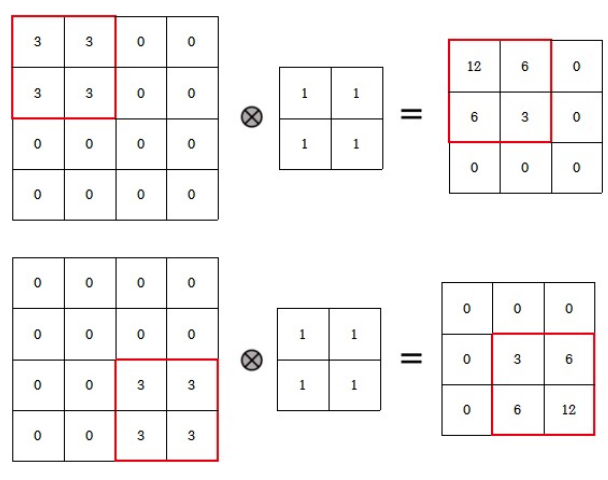

```
Invariance: 불변성 
- CNN은 invariance하다 (Translation에 대해서 invariance하다)
- 똑같은 특징이 있으면 위치와 상관없이 똑같은 값을 예측한다 
- CNN은 Rotation, size, viewpoint, illumination에 대해서는 invariance하지 않다 
(CNN은 회전되거나, 시점이다르거나, 사이즈가 다르거나 밝기가 다른 이미지는 예측할 수 없다)

Equivariance: 동일한 
- input의 위치가 달라지면 output의 위치가 달라진다 
- convolution 연산은 equivariance의 특징을 갖는다 

CNN 모델이 범용적으로 쓰이려면 data augmentation이 필요하다  
```

## Pooling

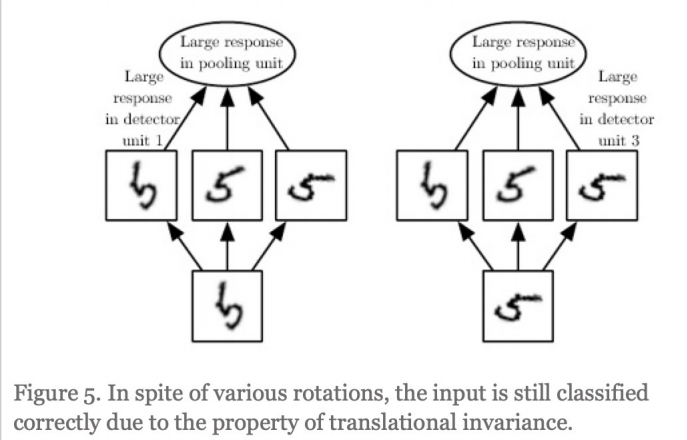

```
pooling은 대표적인 값으로 줄이기 때문에 회전된 이미지도 같은 값으로 인식하는 경우가 발생할 수 있다 
크기가 줄면서 정보의 손실이 발생할 수 있지만 invariance한 특성을 보장하기 때문에 오히려 성능이 늘어날 수 있다 (항상 그런건 아님)
```

## Striving for Simplicity: The All Convolutional Net

``` 
stride를 크게하면 pooling 쓰지 않으면서 pooling을 한 것 같은 효과를 볼 수 있다   
conv + pooling => stride를 크게 하여 conv하나로 만든다 

pooling을 하는 것보다 연산복잡도가 줄어들기 때문에 성능은 유지하면서 학습 속도를 빠르게 할 수 있다는 장점이 있다 
```

## 논문 LeNet-5 구현

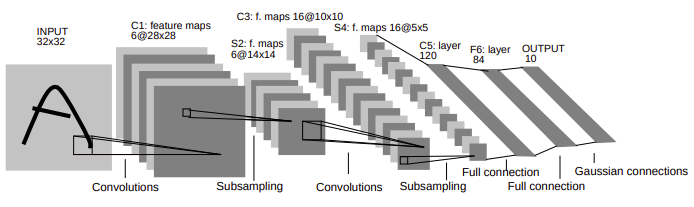

In [40]:
input_ = tf.keras.Input(shape=(32,32,1))
x = tf.keras.layers.Conv2D(6, 5)(input_) # filter 개수, filter 크기 / stride는 생략되었기 때문에 1이라 가정한다 / padding: valid
x = tf.keras.layers.Activation('tanh')(x) # 그 당시 LeRU가 없었다 
model = tf.keras.models.Model(input_, x)ㄴ

In [41]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________
